<a href="https://colab.research.google.com/github/ReynadelYolo/ML_Projects/blob/main/Chatbot_Analytics_V1_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets sweetviz

from datasets import load_dataset


dataset = load_dataset("electricsheepafrica/nigerian-telecom-chatbot-and-live-chat-logs")

print(dataset)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 73.7 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

chatbot_and_live_chat_logs.parquet:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/400000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['session_id', 'session_start', 'session_end', 'duration_seconds', 'customer_id', 'operator', 'channel', 'intent', 'handled_by', 'escalated_to_human', 'message_count', 'resolved', 'customer_satisfaction', 'language'],
        num_rows: 400000
    })
})


In [2]:
import pandas as pd
df = dataset['train'].to_pandas()
df.head()

session_id       session_start         session_end  duration_seconds  \
0  CHAT00000001 2025-09-16 06:01:00 2025-09-16 06:02:47               107   
1  CHAT00000002 2025-09-03 00:38:00 2025-09-03 00:42:49               289   
2  CHAT00000003 2025-09-09 01:23:00 2025-09-09 01:36:55               835   
3  CHAT00000004 2025-09-04 11:21:00 2025-09-04 11:33:36               756   
4  CHAT00000005 2025-09-13 03:09:00 2025-09-13 03:11:11               131   

   customer_id operator   channel          intent handled_by  \
0  CUST5465481      MTN  whatsapp     port_number        bot   
1  CUST7117483   Airtel       app     port_number        bot   
2  CUST4948915      MTN       app     port_number      human   
3  CUST1858299      MTN       app  recharge_issue      human   
4  CUST8344247   Airtel       web     port_number        bot   

   escalated_to_human  message_count  resolved  customer_satisfaction language  
0               False             14      True                      5  english  
1               False             21      True                      5  english  
2                True              6      True                      3  english  
3                True             25      True                      4  english  
4               False             18      True                      1   pidgin

In [3]:
print(df.isnull().sum())

session_id               0
session_start            0
session_end              0
duration_seconds         0
customer_id              0
operator                 0
channel                  0
intent                   0
handled_by               0
escalated_to_human       0
message_count            0
resolved                 0
customer_satisfaction    0
language                 0
dtype: int64


In [4]:
# Access first row
print(dataset['train'][0])

# Access a specific column
print(dataset['train']['language'][:5])

{'session_id': 'CHAT00000001', 'session_start': Timestamp('2025-09-16 06:01:00'), 'session_end': Timestamp('2025-09-16 06:02:47'), 'duration_seconds': 107, 'customer_id': 'CUST5465481', 'operator': 'MTN', 'channel': 'whatsapp', 'intent': 'port_number', 'handled_by': 'bot', 'escalated_to_human': False, 'message_count': 14, 'resolved': True, 'customer_satisfaction': 5, 'language': 'english'}
['english', 'english', 'english', 'english', 'pidgin']


In [5]:
print(f"Dataset Shape: {df.shape}")
df.info()

Dataset Shape: (400000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   session_id             400000 non-null  object        
 1   session_start          400000 non-null  datetime64[ns]
 2   session_end            400000 non-null  datetime64[ns]
 3   duration_seconds       400000 non-null  int64         
 4   customer_id            400000 non-null  object        
 5   operator               400000 non-null  object        
 6   channel                400000 non-null  object        
 7   intent                 400000 non-null  object        
 8   handled_by             400000 non-null  object        
 9   escalated_to_human     400000 non-null  bool          
 10  message_count          400000 non-null  int64         
 11  resolved               400000 non-null  bool          
 12  customer_satisfa

In [6]:
# =============================================================================
# CELL 1: SYNTHETIC DATA ADDITION
# =============================================================================

import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# 1. SEX
df['sex'] = df['session_id'].apply(lambda x: 'Male' if hash(x) % 2 == 0 else 'Female')

# 2. AGE
def assign_age(session_id):
    np.random.seed(hash(session_id + 'age') % 10000)
    return min(max(int(np.random.beta(2, 5) * 47 + 18), 18), 65)
df['age'] = df['session_id'].apply(assign_age)

# 3. ZONE
zone_weights = {'South West': 0.28, 'North West': 0.22, 'North Central': 0.16,
                'South South': 0.14, 'South East': 0.12, 'North East': 0.08}
def assign_zone(session_id):
    np.random.seed(hash(session_id + 'zone') % 10000)
    return np.random.choice(list(zone_weights.keys()), p=list(zone_weights.values()))
df['zone'] = df['session_id'].apply(assign_zone)

# 4. MONTH
month_weights = [0.09, 0.07, 0.08, 0.08, 0.08, 0.07, 0.08, 0.08, 0.08, 0.09, 0.09, 0.11]
def assign_month(session_id):
    np.random.seed(hash(session_id + 'month') % 10000)
    return np.random.choice(range(1, 13), p=month_weights)
df['month'] = df['session_id'].apply(assign_month)

# 5. ESCALATION (~8.5%)
intent_escalation_rates = {
    'check_balance': 0.02, 'check_data_balance': 0.03, 'tariff_info': 0.04,
    'buy_data': 0.05, 'general_inquiry': 0.06, 'bill_inquiry': 0.08,
    'recharge_issue': 0.12, 'port_number': 0.15, 'network_issue': 0.18, 'complaint': 0.22
}

def assign_escalation(row):
    base_rate = intent_escalation_rates.get(row['intent'], 0.05)
    if row['duration_seconds'] > 600:
        base_rate += 0.05
    np.random.seed(hash(row['session_id'] + 'escalation') % 10000)
    return np.random.random() < base_rate

df['escalated_to_human'] = df.apply(assign_escalation, axis=1)

# 6. DIRECT HUMAN ROUTING (separate from escalation)
direct_human_rates = {
    'check_balance': 0.05, 'check_data_balance': 0.08, 'tariff_info': 0.10,
    'buy_data': 0.12, 'general_inquiry': 0.15, 'bill_inquiry': 0.25,
    'recharge_issue': 0.35, 'port_number': 0.45, 'network_issue': 0.40, 'complaint': 0.50
}

def assign_direct_human(row):
    if row['escalated_to_human']:
        return False  # Not direct - it's escalation
    np.random.seed(hash(row['session_id'] + 'direct_human') % 10000)
    return np.random.random() < direct_human_rates.get(row['intent'], 0.10)

df['direct_to_human'] = df.apply(assign_direct_human, axis=1)

# 7. FINAL HANDLED_BY
df['handled_by'] = df.apply(
    lambda row: 'human' if row['escalated_to_human'] or row['direct_to_human'] else 'bot',
    axis=1
)

# VERIFICATION
print(f"""
📊 ROUTING SUMMARY:
Escalated to Human: {df['escalated_to_human'].sum():,} ({df['escalated_to_human'].mean()*100:.1f}%)
Direct to Human: {df['direct_to_human'].sum():,} ({df['direct_to_human'].mean()*100:.1f}%)
Total Human: {(df['handled_by']=='human').sum():,} ({(df['handled_by']=='human').mean()*100:.1f}%)
Bot Handled: {(df['handled_by']=='bot').sum():,} ({(df['handled_by']=='bot').mean()*100:.1f}%)
""")

# 8. CONVERSATION TEXT & SENTIMENT
conversation_templates = {
    'check_balance': [("How do I check my balance?", "neutral"), ("What's my balance?", "neutral")],
    'check_data_balance': [("How much data do I have left?", "neutral"), ("Check my data balance", "neutral")],
    'tariff_info': [("What are your tariff plans?", "neutral"), ("Tell me about call rates", "neutral"),  ("Your prices are reasonable", "positive")],
    'buy_data': [("I want to buy data", "neutral"), ("Data purchase please", "neutral"), ("Data finished too fast!", "negative"),("Data purchase was smooth, thanks!", "positive")],
    'general_inquiry': [("I have a question", "neutral"), ("Can you help me?", "neutral"), ("Thanks for the help!", "positive"), ("You were very helpful!", "positive")],
    'bill_inquiry': [("Explain my bill please", "neutral"), ("Why is my bill so high?", "negative"), ("Charges unclear", "negative"),("Unexpected charges on my account", "negative"),("Bill breakdown please", "neutral"), ("Thanks for clarifying my bill", "positive")],
    'recharge_issue': [("Recharge not working", "negative"), ("My recharge failed!", "negative"), ("Money deducted but no credit", "negative"),("PIN not working", "negative"), ("Recharge successful now, thanks!", "positive"), ("Still waiting for my credit", "negative")],
    'port_number': [("I want to port my number", "neutral"), ("How to transfer to another network?", "neutral"),  ("Porting was easy, thank you!", "positive")],
    'network_issue': [("No network in my area", "negative"), ("Calls keep dropping", "negative"), ("Network very poor!", "negative"), ("Internet keeps disconnecting", "negative"), ("Network improved recently", "positive")],
    'complaint': [("I have a complaint", "negative"), ("Service is terrible!", "negative"), ("Very disappointed", "negative"), ("Worst experience ever", "negative"), ("Issue resolved, thank you", "positive")]
}
def generate_conversation(row):
    np.random.seed(hash(row['session_id'] + 'conv') % 10000)
    templates = conversation_templates.get(row['intent'], [("General inquiry", "neutral")])
    return templates[np.random.randint(0, len(templates))]
conv_data = df.apply(generate_conversation, axis=1)
df['conversation_text'] = conv_data.apply(lambda x: x[0])
df['sentiment'] = conv_data.apply(lambda x: x[1])

# VERIFICATION
print(f"Shape: {df.shape}")
print(f"Escalation Rate: {df['escalated_to_human'].mean()*100:.2f}%")
print(f"Human Rate: {(df['handled_by'] == 'human').mean()*100:.2f}%")
print(f"Sentiment:\n{df['sentiment'].value_counts(normalize=True).round(3)}")


📊 ROUTING SUMMARY:
Escalated to Human: 46,164 (11.5%)
Direct to Human: 83,309 (20.8%)
Total Human: 129,473 (32.4%)
Bot Handled: 270,527 (67.6%)

Shape: (400000, 21)
Escalation Rate: 11.54%
Human Rate: 32.37%
Sentiment:
sentiment
neutral     0.468
negative    0.319
positive    0.213
Name: proportion, dtype: float64


In [7]:
# CELL 2: FEATURE ENGINEERING

# TIME FEATURES
df['response_latency'] = df['duration_seconds'] / df['message_count']
df['hour'] = df['session_start'].dt.hour
df['day_of_week'] = df['session_start'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['is_peak_hour'] = df['hour'].isin([9,10,11,12,13,17,18,19]).astype(int)
df['time_period'] = pd.cut(df['hour'],
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
    include_lowest=True)

# USER BEHAVIOR FEATURES
df['session_count'] = df.groupby('customer_id')['session_id'].transform('count')
df['is_recurring_user'] = (df['session_count'] > 1).astype(int)
df['is_long_session'] = (df['duration_seconds'] > df['duration_seconds'].quantile(0.75)).astype(int)

# CONVERSATION TEXT FEATURES
df['conversation_length'] = df['conversation_text'].str.len()
df['word_count'] = df['conversation_text'].str.split().str.len()
df['message_frequency'] = df['message_count'] / (df['duration_seconds'] / 60)  # messages per minute

# SENTIMENT FEATURES
df['is_negative_sentiment'] = (df['sentiment'] == 'negative').astype(int)
df['is_positive_sentiment'] = (df['sentiment'] == 'positive').astype(int)

# CATEGORICAL FEATURES
df['satisfaction_tier'] = pd.cut(df['customer_satisfaction'],
    bins=[0, 2, 3, 5], labels=['Detractor', 'Passive', 'Promoter'])

df['age_group'] = pd.cut(df['age'],
    bins=[18, 25, 35, 45, 55, 65],
    labels=['18-25', '26-35', '36-45', '46-55', '56-65'],
    include_lowest=True)

# AGGREGATED METRICS (SYNTHETIC DATA)
df['intent_complexity'] = df.groupby('intent')['escalated_to_human'].transform('mean')
df['zone_avg_csat'] = df.groupby('zone')['customer_satisfaction'].transform('mean')
df['month_session_volume'] = df.groupby('month')['session_id'].transform('count')
df['intent_negative_rate'] = df.groupby('intent')['is_negative_sentiment'].transform('mean')
df['operator_escalation_rate'] = df.groupby('operator')['escalated_to_human'].transform('mean')


# VERIFICATION
print(f"Total columns: {df.shape[1]}")
print(f"\nSentiment Distribution:\n{df['sentiment'].value_counts(normalize=True).round(3)}")
print(f"\nAge Group:\n{df['age_group'].value_counts()}")
print(f"Age Group NaN: {df['age_group'].isna().sum()}")
print(f"\nIntent Complexity (Escalation Rate):\n{df.groupby('intent')['escalated_to_human'].mean().sort_values(ascending=False).round(3)}")

Total columns: 42

Sentiment Distribution:
sentiment
neutral     0.468
negative    0.319
positive    0.213
Name: proportion, dtype: float64

Age Group:
age_group
26-35    188156
18-25    107081
36-45     87271
46-55     16929
56-65       563
Name: count, dtype: int64
Age Group NaN: 0

Intent Complexity (Escalation Rate):
intent
complaint             0.238
network_issue         0.205
port_number           0.175
recharge_issue        0.142
bill_inquiry          0.099
general_inquiry       0.082
buy_data              0.071
tariff_info           0.057
check_data_balance    0.047
check_balance         0.039
Name: escalated_to_human, dtype: float64


In [36]:
# CELL 3: DATA ADJUSTMENTS

import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# ADJUSTED RESOLVED - CORRECTED LOGIC
def adjust_resolved(row):
    np.random.seed(RANDOM_SEED + hash(row['session_id']) % 10000)

    intent_bot_rate = {
        'check_balance': 0.88,      'check_data_balance': 0.86,
        'buy_data': 0.85,           'tariff_info': 0.84,
        'general_inquiry': 0.83,    'bill_inquiry': 0.80,
        'recharge_issue': 0.72,     'port_number': 0.70,
        'network_issue': 0.68,      'complaint': 0.65,
    }

    intent_human_rate = {
        'check_balance': 0.82,      'check_data_balance': 0.80,
        'buy_data': 0.79,           'tariff_info': 0.78,
        'general_inquiry': 0.77,    'bill_inquiry': 0.82,
        'recharge_issue': 0.85,     'port_number': 0.85,
        'network_issue': 0.84,      'complaint': 0.83,
    }

    if row['adjusted_handled_by'] == 'bot':
        base = intent_bot_rate.get(row['intent'], 0.75)
    else:
        base = intent_human_rate.get(row['intent'], 0.82)

    if row['sentiment'] == 'negative': base -= 0.03

    final_prob = np.clip(base + np.random.normal(0, 0.02), 0.50, 0.95)
    return np.random.random() < final_prob

df['adjusted_resolved'] = df.apply(adjust_resolved, axis=1)

# ADJUSTED ESCALATION - WITH ZONE VARIATION
zone_escalation_profiles = {
    'North': -0.08,        # Lower escalation (better service)
    'South': 0.12,         # Higher escalation (more issues)
    'East': -0.03,
    'West': 0.15,          # Highest escalation
    'Central': -0.10,      # Best service, lowest escalation
    'North East': 0.05,
    'North West': 0.08,
    'South East': -0.05,
    'South West': 0.10
}

def adjust_escalated(row):
    np.random.seed(RANDOM_SEED + hash(row['session_id']) % 10000)
    base_prob = 0.13  # Base escalation probability

    # Zone effect
    zone_effect = zone_escalation_profiles.get(row['zone'], 0)

    # Other factors
    if row['sentiment'] == 'negative': zone_effect += 0.15
    if row['intent'] in ['complaint', 'technical_support']: zone_effect += 0.10

    final_prob = np.clip(base_prob + zone_effect + np.random.normal(0, 0.02), 0.02, 0.40)
    return np.random.random() < final_prob

df['adjusted_escalated'] = df.apply(adjust_escalated, axis=1)

# ADJUSTED HANDLED_BY
df['adjusted_handled_by'] = df.apply(
    lambda row: 'human' if row['adjusted_escalated'] or row['direct_to_human'] else 'bot',
    axis=1
)

# ADJUSTED CSAT - WITH DEMOGRAPHIC VARIATION
operator_profiles = {'MTN': 0.3, 'Airtel': 0.1, 'Glo': -0.1, '9mobile': -0.2}

# ADD THESE demographic profiles
age_profiles = {'18-25': -0.4, '26-35': -0.1, '36-45': 0.0, '46-55': 0.25, '56-65': 0.5}
zone_profiles = {'North': 0.3, 'South': -0.3, 'East': 0.15, 'West': -0.15,
                 'Central': 0.4, 'North East': 0.0, 'North West': -0.2,
                 'South East': 0.2, 'South West': -0.35}
sex_profiles = {'Female': 0.15, 'Male': -0.1}

def adjust_csat(row):
    np.random.seed(RANDOM_SEED + hash(row['session_id']) % 10000)
    adjusted = row['customer_satisfaction'] + operator_profiles.get(row['operator'], 0) + np.random.normal(0, 0.3)

    # ADD demographic adjustments
    adjusted += age_profiles.get(row['age_group'], 0)
    adjusted += zone_profiles.get(row['zone'], 0)
    adjusted += sex_profiles.get(row['sex'], 0)

    if row['adjusted_resolved']: adjusted += 0.5
    if row['adjusted_escalated']: adjusted -= 0.2
    if row['sentiment'] == 'negative': adjusted -= 0.3
    elif row['sentiment'] == 'positive': adjusted += 0.2

    return int(np.clip(round(adjusted), 1, 5))

df['adjusted_csat'] = df.apply(adjust_csat, axis=1)

# COMPLETION RATE
df['completion_rate'] = df['adjusted_resolved'].astype(int)

# DEPENDENT FEATURES
df['adj_operator_resolution_rate'] = df.groupby('operator')['adjusted_resolved'].transform('mean')
df['adj_channel_resolution_rate'] = df.groupby('channel')['adjusted_resolved'].transform('mean')
df['adj_zone_resolution_rate'] = df.groupby('zone')['adjusted_resolved'].transform('mean')
df['adjusted_satisfaction_tier'] = pd.cut(df['adjusted_csat'], bins=[0,2,3,5], labels=['Detractor','Passive','Promoter'])
df['adj_bot_handled'] = (df['adjusted_handled_by'] == 'bot').astype(int)
df['adj_bot_resolved'] = ((df['adjusted_handled_by'] == 'bot') & df['adjusted_resolved']).astype(int)

df['bot_abandoned'] = ((df['adjusted_handled_by'] == 'bot') & ~df['adjusted_resolved']).astype(int)
df['human_via_escalation'] = df['adjusted_escalated'].astype(int)
df['human_via_direct'] = (df['direct_to_human'] & ~df['adjusted_escalated']).astype(int)
df['human_resolved'] = ((df['adjusted_handled_by'] == 'human') & df['adjusted_resolved']).astype(int)
df['human_unresolved'] = ((df['adjusted_handled_by'] == 'human') & ~df['adjusted_resolved']).astype(int)


# VERIFICATION
print("Resolution by Intent:")
print(df.groupby('intent')['adjusted_resolved'].mean().sort_values(ascending=False).round(3))

print(f"""
📊 SESSION FLOW:
Bot: {df['adj_bot_handled'].sum():,} (Resolved: {df['adj_bot_resolved'].sum():,} | Abandoned: {df['bot_abandoned'].sum():,})
Human: {(df['adjusted_handled_by']=='human').sum():,} (Escalated: {df['human_via_escalation'].sum():,} | Direct: {df['human_via_direct'].sum():,})
Total: {len(df):,} ✓
""")

Resolution by Intent:
intent
check_balance         0.880
check_data_balance    0.861
buy_data              0.840
tariff_info           0.839
general_inquiry       0.825
bill_inquiry          0.794
port_number           0.756
recharge_issue        0.739
network_issue         0.709
complaint             0.697
Name: adjusted_resolved, dtype: float64

📊 SESSION FLOW:
Bot: 247,852 (Resolved: 180,690 | Abandoned: 67,162)
Human: 152,148 (Escalated: 89,775 | Direct: 62,373)
Total: 400,000 ✓



In [18]:
print(f"Dataset Shape: {df.shape}")
df.info()

Dataset Shape: (400000, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 58 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   session_id                    400000 non-null  object        
 1   session_start                 400000 non-null  datetime64[ns]
 2   session_end                   400000 non-null  datetime64[ns]
 3   duration_seconds              400000 non-null  int64         
 4   customer_id                   400000 non-null  object        
 5   operator                      400000 non-null  object        
 6   channel                       400000 non-null  object        
 7   intent                        400000 non-null  object        
 8   handled_by                    400000 non-null  object        
 9   escalated_to_human            400000 non-null  bool          
 10  message_count                 400000 non-null  int64

In [22]:
# CELL 4: FEATURE SELECTION

master_feature_list = [
    # 1. TECHNICAL PERFORMANCE & ACCURACY (Task 2.1)
    'intent',                      # Detected intent for accuracy analysis
    'response_latency',            # Response time metrics
    'intent_complexity',           # Hidden patterns in model failure
    'message_count',               # Session depth

    # 2. NLP & SENTIMENT ANALYSIS
    'conversation_text',           # NLP technique applications
    'sentiment',                   # Qualitative user interaction analysis
    'is_negative_sentiment',       # High-friction session trigger
    'is_positive_sentiment',       # Success pattern indicator

    # 3. USER SEGMENTATION & ACCESSIBILITY (Task 1)
    'age_group',                   # Demographic segmentation
    'sex',                         # Socio-demographic analysis
    'channel',                     # Platform analysis (Web/Mobile)
    'zone',                        # Geographic performance
    'language',                    # Accessibility/Diversity optimization
    'is_recurring_user',           # Personalization strategy evaluation

    # 4. BUSINESS VALUE & KPI ANALYSIS (Task 2.3 & Task 3)
    'adjusted_csat',               # Customer Satisfaction for NPS
    'satisfaction_tier',           # NPS breakdown (Promoter/Passive/Detractor)
    'completion_rate',             # Bot efficiency measure
    'escalated_to_human',          # Containment rate & operational cost
    'bot_abandoned',               # Churn & negative LTV impact

    # 5. TEMPORAL PATTERNS (Task 2.2)
    'is_peak_hour',                # High load performance
    'day_of_week',                 # Behavioral trends
    'hour',                        # Granular time-series
    'is_weekend',                  # Weekend vs weekday habits

    # 6. OPERATIONAL EFFICIENCY (Task 2.4) [ADDED SECTION]
    'adjusted_handled_by',         # Bot vs Human comparison
    'operator',                    # Operator performance analysis
    'duration_seconds',            # Session efficiency metrics
    'human_via_escalation',        # Escalation funnel analysis
]

# Final Analytics DataFrame
df_master = df[master_feature_list].copy()

print(f"Total Features Selected: {len(df_master.columns)}")
print(f"Total Log Entries for Analysis: {len(df_master)}")

df_master.head()

Total Features Selected: 27
Total Log Entries for Analysis: 400000


intent  response_latency  intent_complexity  message_count  \
0     port_number          7.642857           0.174620             14   
1     port_number         13.761905           0.174620             21   
2     port_number        139.166667           0.174620              6   
3  recharge_issue         30.240000           0.142463             25   
4     port_number          7.277778           0.174620             18   

              conversation_text sentiment  is_negative_sentiment  \
0  Porting was easy, thank you!  positive                      0   
1  Porting was easy, thank you!  positive                      0   
2      I want to port my number   neutral                      0   
3           My recharge failed!  negative                      1   
4      I want to port my number   neutral                      0   

   is_positive_sentiment age_group     sex  ... escalated_to_human  \
0                      1     26-35  Female  ...              False   
1                      1     26-35  Female  ...              False   
2                      0     26-35    Male  ...              False   
3                      0     26-35  Female  ...               True   
4                      0     36-45  Female  ...              False   

  bot_abandoned is_peak_hour  day_of_week  hour is_weekend  \
0             0            0            1     6          0   
1             0            0            2     0          0   
2             1            0            1     1          0   
3             0            1            3    11          0   
4             0            0            5     3          1   

   adjusted_handled_by  operator  duration_seconds  human_via_escalation  
0                  bot       MTN               107                     0  
1                human    Airtel               289                     0  
2                  bot       MTN               835                     0  
3                human       MTN               756                     1  
4                human    Airtel               131                     0  

[5 rows x 27 columns]

In [23]:
# CELL 5: CHATBOT ANALYTICS  PLOTLY
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- 1. RESOLUTION & CSAT BY INTENT ---
fig1 = make_subplots(rows=1, cols=2, subplot_titles=('Resolution Rate by Intent', 'Avg CSAT by Intent'))

intent_res = df.groupby('intent')['adjusted_resolved'].mean().sort_values(ascending=True).reset_index()
intent_csat = df.groupby('intent')['adjusted_csat'].mean().sort_values(ascending=True).reset_index()

fig1.add_trace(go.Bar(x=intent_res['adjusted_resolved'], y=intent_res['intent'], orientation='h', marker_color='steelblue'), row=1, col=1)
fig1.add_trace(go.Bar(x=intent_csat['adjusted_csat'], y=intent_csat['intent'], orientation='h', marker_color='seagreen'), row=1, col=2)
fig1.update_layout(height=400, showlegend=False, title_text="Intent Performance")
fig1.show()

# --- 2. OPERATOR COMPARISON ---
op_metrics = df.groupby('operator').agg({
    'adjusted_resolved': 'mean',
    'adjusted_csat': 'mean',
    'adjusted_escalated': 'mean'
}).round(3).reset_index()

fig2 = px.bar(op_metrics.melt(id_vars='operator'), x='operator', y='value', color='variable',
              barmode='group', title='Operator Performance Comparison',
              labels={'value': 'Rate/Score', 'variable': 'Metric'})
fig2.show()

# --- 3. CONVERSATION FUNNEL (Sankey) ---
total = len(df)
bot_handled = (df['adjusted_handled_by'] == 'bot').sum()
human_handled = (df['adjusted_handled_by'] == 'human').sum()
bot_resolved = df['adj_bot_resolved'].sum()
bot_unresolved = bot_handled - bot_resolved
human_resolved = ((df['adjusted_handled_by'] == 'human') & df['adjusted_resolved']).sum()
human_unresolved = human_handled - human_resolved

fig3 = go.Figure(go.Sankey(
    node=dict(label=['All Sessions', 'Bot', 'Human', 'Bot Resolved', 'Bot Unresolved', 'Human Resolved', 'Human Unresolved']),
    link=dict(
        source=[0, 0, 1, 1, 2, 2],
        target=[1, 2, 3, 4, 5, 6],
        value=[bot_handled, human_handled, bot_resolved, bot_unresolved, human_resolved, human_unresolved]
    )
))
fig3.update_layout(title_text="Conversation Funnel", height=400)
fig3.show()

# Print comparison summary
print(f"\n📊 Resolution Rate Comparison:")
print(f"   Bot Resolved:    {bot_res_pct:.1f}% | Unresolved: {bot_unres_pct:.1f}%")
print(f"   Human Resolved:  {human_res_pct:.1f}% | Unresolved: {human_unres_pct:.1f}%")

# --- 4. HOURLY VOLUME & ESCALATION (IMPROVED) ---
hourly = df.groupby('hour').agg({
    'session_id': 'count',
    'adjusted_escalated': 'mean'
}).reset_index()
hourly.columns = ['hour', 'volume', 'escalation_rate']
hourly['escalation_pct'] = (hourly['escalation_rate'] * 100).round(1)  # Convert to %

fig4 = make_subplots(specs=[[{"secondary_y": True}]])

fig4.add_trace(go.Bar(x=hourly['hour'], y=hourly['volume'],
                      name='Session Volume', marker_color='lightblue',
                      hovertemplate='Hour %{x}<br>Volume: %{y:,}<extra></extra>'),
               secondary_y=False)

fig4.add_trace(go.Scatter(x=hourly['hour'], y=hourly['escalation_pct'],
                          name='Escalation Rate (%)', line=dict(color='red', width=3),
                          hovertemplate='Hour %{x}<br>Escalation: %{y:.1f}%<extra></extra>'),
               secondary_y=True)

fig4.update_layout(title='Hourly Traffic & Escalation Rate', xaxis_title='Hour of Day')
fig4.update_yaxes(title_text="Session Volume", secondary_y=False)
fig4.update_yaxes(title_text="Escalation Rate (%)", ticksuffix="%", secondary_y=True)
fig4.show()

print(f"Escalation Range: {hourly['escalation_pct'].min():.1f}% - {hourly['escalation_pct'].max():.1f}%")


# --- 5. SENTIMENT ANALYSIS (FIXED) ---
fig5 = make_subplots(rows=1, cols=2,
                     specs=[[{"type": "domain"}, {"type": "xy"}]],
                     subplot_titles=('Sentiment Distribution', 'CSAT by Sentiment'))

sent_dist = df['sentiment'].value_counts().reset_index()
sent_dist.columns = ['sentiment', 'count']
sent_csat = df.groupby('sentiment')['adjusted_csat'].mean().reset_index()

fig5.add_trace(go.Pie(labels=sent_dist['sentiment'], values=sent_dist['count'], hole=0.4), row=1, col=1)
fig5.add_trace(go.Bar(x=sent_csat['sentiment'], y=sent_csat['adjusted_csat'], marker_color=['red','gray','green']), row=1, col=2)
fig5.update_layout(height=350, title_text="Sentiment Impact", showlegend=False)
fig5.show()

# --- 6. ZONE PERFORMANCE  ---
# Show % of Happy/Neutral/Unhappy customers per zone
zone_sat = df.groupby(['zone', 'adjusted_satisfaction_tier']).size().unstack(fill_value=0)
zone_sat_pct = zone_sat.div(zone_sat.sum(axis=1), axis=0)

fig6 = px.bar(zone_sat_pct.reset_index().melt(id_vars='zone'),
              x='zone', y='value', color='adjusted_satisfaction_tier',
              color_discrete_map={'Detractor': '#e74c3c', 'Passive': '#f39c12', 'Promoter': '#27ae60'},
              title='Customer Satisfaction Distribution by Zone',
              labels={'value': 'Percentage', 'adjusted_satisfaction_tier': 'Satisfaction'})
fig6.update_layout(barmode='stack')
fig6.show()

# --- 7. SATISFACTION TIER DISTRIBUTION ---
fig7 = px.sunburst(df, path=['operator', 'adjusted_satisfaction_tier'], title='Satisfaction Tiers by Operator')
fig7.show()

print("✅ Chatbot Analytics Dashboard Complete")


📊 Resolution Rate Comparison:
   Bot Resolved:    86.9% | Unresolved: 13.1%
   Human Resolved:  68.9% | Unresolved: 31.1%


Escalation Range: 13.0% - 14.0%


/tmp/ipython-input-2850595406.py:98: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



✅ Chatbot Analytics Dashboard Complete


In [24]:
# =============================================================================
# CELL 5.1: CHATBOT ANALYTICS DASHBOARD (Aligned with Master Feature List)
# =============================================================================
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("📊 Generating Analytics Dashboard...")

# --- 1. TECHNICAL PERFORMANCE (Section 1: intent, response_latency, intent_complexity, message_count) ---
fig1 = make_subplots(rows=1, cols=2,
    subplot_titles=('Avg Response Latency by Intent', 'Intent Complexity vs Message Count'))

intent_perf = df.groupby('intent').agg({
    'response_latency': 'mean',
    'intent_complexity': 'mean',
    'message_count': 'mean'
}).sort_values('response_latency', ascending=True).reset_index()

fig1.add_trace(go.Bar(x=intent_perf['response_latency'], y=intent_perf['intent'],
    orientation='h', marker_color='steelblue', name='Latency (s)'), row=1, col=1)
fig1.add_trace(go.Scatter(x=intent_perf['intent_complexity'], y=intent_perf['message_count'],
    mode='markers+text', text=intent_perf['intent'], textposition='top center',
    marker=dict(size=12, color='coral'), name='Complexity'), row=1, col=2)
fig1.update_layout(height=400, title_text="📈 Technical Performance Analysis", showlegend=False)
fig1.show()

# --- 2. SENTIMENT ANALYSIS (Section 2: sentiment, is_negative_sentiment, is_positive_sentiment) ---
fig2 = make_subplots(rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "xy"}]],
    subplot_titles=('Sentiment Distribution', 'CSAT by Sentiment'))

sent_dist = df['sentiment'].value_counts().reset_index()
sent_dist.columns = ['sentiment', 'count']
sent_csat = df.groupby('sentiment')['adjusted_csat'].mean().reset_index()

colors_sent = {'negative': '#e74c3c', 'neutral': '#95a5a6', 'positive': '#27ae60'}
fig2.add_trace(go.Pie(labels=sent_dist['sentiment'], values=sent_dist['count'], hole=0.4,
    marker_colors=[colors_sent.get(s, 'gray') for s in sent_dist['sentiment']]), row=1, col=1)
fig2.add_trace(go.Bar(x=sent_csat['sentiment'], y=sent_csat['adjusted_csat'],
    marker_color=[colors_sent.get(s, 'gray') for s in sent_csat['sentiment']]), row=1, col=2)
fig2.update_layout(height=350, title_text="💬 Sentiment Impact Analysis", showlegend=False)
fig2.show()


# --- 3. USER SEGMENTATION (Section 3: age_group, sex, channel, zone, is_recurring_user) ---
fig3 = make_subplots(rows=2, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}],   # Row 1: Bar, Pie
           [{"type": "xy"}, {"type": "xy"}]],       # Row 2: Bar, Bar
    subplot_titles=('Sessions by Age Group', 'Channel Distribution',
                    'Recurring vs New Users', 'Geographic Distribution'))

# Age group
age_data = df['age_group'].value_counts().sort_index().reset_index()
fig3.add_trace(go.Bar(x=age_data['age_group'], y=age_data['count'], marker_color='mediumpurple'), row=1, col=1)

# Channel (Pie - now compatible)
channel_data = df['channel'].value_counts().reset_index()
fig3.add_trace(go.Pie(labels=channel_data['channel'], values=channel_data['count'], hole=0.3), row=1, col=2)

# Recurring users
recurring = df['is_recurring_user'].value_counts().reset_index()
recurring['label'] = recurring['is_recurring_user'].map({0: 'New User', 1: 'Recurring'})
fig3.add_trace(go.Bar(x=recurring['label'], y=recurring['count'], marker_color=['lightcoral', 'lightgreen']), row=2, col=1)

# Zone
zone_data = df['zone'].value_counts().reset_index()
fig3.add_trace(go.Bar(x=zone_data['zone'], y=zone_data['count'], marker_color='teal'), row=2, col=2)

fig3.update_layout(height=600, title_text="👥 User Segmentation Overview", showlegend=False)
fig3.show()

# --- 4. BUSINESS KPIs (Section 4: adjusted_csat, satisfaction_tier, completion_rate, escalated_to_human, bot_abandoned) ---
fig4 = make_subplots(rows=1, cols=3,
    specs=[[{"type": "domain"}, {"type": "xy"}, {"type": "xy"}]],
    subplot_titles=('NPS Tiers', 'Completion Rate by Intent', 'Escalation & Abandonment'))

# Satisfaction tier (NPS)
tier_dist = df['satisfaction_tier'].value_counts().reset_index()
tier_colors = {'Detractor': '#e74c3c', 'Passive': '#f39c12', 'Promoter': '#27ae60'}
fig4.add_trace(go.Pie(labels=tier_dist['satisfaction_tier'], values=tier_dist['count'],
    marker_colors=[tier_colors.get(t, 'gray') for t in tier_dist['satisfaction_tier']], hole=0.4), row=1, col=1)

# Completion rate by intent
completion = df.groupby('intent')['completion_rate'].mean().sort_values(ascending=True).reset_index()
fig4.add_trace(go.Bar(x=completion['completion_rate'], y=completion['intent'], orientation='h', marker_color='seagreen'), row=1, col=2)

# Escalation & abandonment rates
esc_rate = df['escalated_to_human'].mean() * 100
abandon_rate = df['bot_abandoned'].mean() * 100
fig4.add_trace(go.Bar(x=['Escalated', 'Abandoned'], y=[esc_rate, abandon_rate],
    marker_color=['orange', 'red'], text=[f'{esc_rate:.1f}%', f'{abandon_rate:.1f}%'], textposition='auto'), row=1, col=3)

fig4.update_layout(height=400, title_text="💰 Business KPI Dashboard", showlegend=False)
fig4.show()

# --- 5. TEMPORAL PATTERNS (Section 5: hour, day_of_week, is_peak_hour, is_weekend) ---
fig5 = make_subplots(rows=1, cols=2,
    subplot_titles=('Hourly Session Volume', 'Day of Week Distribution'))

hourly = df.groupby('hour')['session_id'].count().reset_index()
hourly.columns = ['hour', 'sessions']
fig5.add_trace(go.Bar(x=hourly['hour'], y=hourly['sessions'], marker_color='skyblue'), row=1, col=1)

dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily = df.groupby('day_of_week')['session_id'].count().reset_index()
daily['day_name'] = daily['day_of_week'].map(lambda x: dow_labels[x])
daily['color'] = daily['day_of_week'].apply(lambda x: 'coral' if x >= 5 else 'steelblue')
fig5.add_trace(go.Bar(x=daily['day_name'], y=daily['session_id'], marker_color=daily['color']), row=1, col=2)

fig5.update_layout(height=350, title_text="⏰ Temporal Patterns (Weekend = Orange)", showlegend=False)
fig5.show()


# --- 6. OPERATIONAL EFFICIENCY (Section 6: adjusted_handled_by, operator, duration_seconds, human_via_escalation) ---
fig6 = make_subplots(rows=1, cols=3,
    specs=[[{"type": "domain"}, {"type": "xy"}, {"type": "xy"}]],  # FIXED: domain for Pie
    subplot_titles=('Bot vs Human Handling', 'Operator Performance', 'Session Duration by Handler'))

# Handler distribution
handler = df['adjusted_handled_by'].value_counts().reset_index()
fig6.add_trace(go.Pie(labels=handler['adjusted_handled_by'], values=handler['count'], hole=0.4,
    marker_colors=['#3498db', '#e67e22']), row=1, col=1)

# Operator comparison
op_perf = df.groupby('operator').agg({'adjusted_csat': 'mean', 'completion_rate': 'mean'}).reset_index()
fig6.add_trace(go.Bar(x=op_perf['operator'], y=op_perf['adjusted_csat'], name='CSAT', marker_color='steelblue'), row=1, col=2)

# Duration by handler
duration = df.groupby('adjusted_handled_by')['duration_seconds'].mean().reset_index()
fig6.add_trace(go.Bar(x=duration['adjusted_handled_by'], y=duration['duration_seconds'],
    marker_color=['#3498db', '#e67e22']), row=1, col=3)

fig6.update_layout(height=350, title_text="⚙️ Operational Efficiency", showlegend=False)
fig6.show()

# --- 7. CONVERSATION FUNNEL (with Percentages)
total = len(df)
bot_handled = (df['adjusted_handled_by'] == 'bot').sum()
human_handled = (df['adjusted_handled_by'] == 'human').sum()
bot_resolved = df['adj_bot_resolved'].sum()
bot_unresolved = bot_handled - bot_resolved
human_resolved = ((df['adjusted_handled_by'] == 'human') & df['adjusted_resolved']).sum()
human_unresolved = human_handled - human_resolved

# Calculate percentages
bot_pct = bot_handled / total * 100
human_pct = human_handled / total * 100
bot_res_pct = bot_resolved / bot_handled * 100 if bot_handled > 0 else 0
bot_unres_pct = bot_unresolved / bot_handled * 100 if bot_handled > 0 else 0
human_res_pct = human_resolved / human_handled * 100 if human_handled > 0 else 0
human_unres_pct = human_unresolved / human_handled * 100 if human_handled > 0 else 0

fig7 = go.Figure(go.Sankey(
    node=dict(
        label=[
            f'All Sessions<br>({total:,})',
            f'Bot<br>({bot_handled:,} | {bot_pct:.1f}%)',
            f'Human<br>({human_handled:,} | {human_pct:.1f}%)',
            f'Bot Resolved<br>({bot_resolved:,} | {bot_res_pct:.1f}%)',
            f'Bot Unresolved<br>({bot_unresolved:,} | {bot_unres_pct:.1f}%)',
            f'Human Resolved<br>({human_resolved:,} | {human_res_pct:.1f}%)',
            f'Human Unresolved<br>({human_unresolved:,} | {human_unres_pct:.1f}%)'
        ],
        color=['#3498db', '#2ecc71', '#e67e22', '#27ae60', '#c0392b', '#27ae60', '#c0392b']
    ),
    link=dict(
        source=[0, 0, 1, 1, 2, 2],
        target=[1, 2, 3, 4, 5, 6],
        value=[bot_handled, human_handled, bot_resolved, bot_unresolved, human_resolved, human_unresolved],
        color=['rgba(46,204,113,0.4)', 'rgba(230,126,34,0.4)',
               'rgba(39,174,96,0.4)', 'rgba(192,57,43,0.4)',
               'rgba(39,174,96,0.4)', 'rgba(192,57,43,0.4)']
    )
))
fig7.update_layout(title_text="🔀 Conversation Funnel (with Resolution Rates)", height=450)
fig7.show()

# Print comparison summary
print(f"\n📊 Resolution Rate Comparison:")
print(f"   Bot Resolved:    {bot_res_pct:.1f}% | Unresolved: {bot_unres_pct:.1f}%")
print(f"   Human Resolved:  {human_res_pct:.1f}% | Unresolved: {human_unres_pct:.1f}%")

# --- ANALYTICS SUMMARY ---
print("\n" + "="*60)
print("📊 ANALYTICS SUMMARY REPORT")
print("="*60)
print(f"Overall Intent Accuracy: {(1 - df['escalated_to_human'].mean()) * 100:.1f}%")
print(f"Average Response Latency: {df['response_latency'].mean():.2f}s")
print(f"Completion Rate: {df['completion_rate'].mean() * 100:.1f}%")
print(f"Bot Containment Rate: {(df['adjusted_handled_by'] == 'bot').mean() * 100:.1f}%")
print(f"Average CSAT: {df['adjusted_csat'].mean():.2f}/5")
print("="*60)
print("✅ Dashboard Complete")

📊 Generating Analytics Dashboard...



📊 Resolution Rate Comparison:
   Bot Resolved:    86.9% | Unresolved: 13.1%
   Human Resolved:  68.9% | Unresolved: 31.1%

📊 ANALYTICS SUMMARY REPORT
Overall Intent Accuracy: 88.5%
Average Response Latency: 48.03s
Completion Rate: 80.7%
Bot Containment Rate: 65.6%
Average CSAT: 2.96/5
✅ Dashboard Complete


In [27]:
# CELL 5.2

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# --- 1. HEATMAP: Zone × Age Group vs CSAT ---
heatmap_data = df.pivot_table(
    values='adjusted_csat',
    index='zone',
    columns='age_group',
    aggfunc='mean'
).round(2)

fig1 = px.imshow(
    heatmap_data,
    text_auto=True,
    color_continuous_scale='RdYlGn',
    title='Average CSAT by Zone × Age Group',
    labels={'color': 'Avg CSAT'}
)
fig1.update_layout(height=400)
fig1.show()

# --- 2. BAR CHARTS: CSAT by Demographics ---
fig2 = make_subplots(rows=1, cols=3, subplot_titles=['By Age Group', 'By Sex', 'By Zone'])

for i, col in enumerate(['age_group', 'sex', 'zone'], 1):
    agg = df.groupby(col)['adjusted_csat'].mean().round(2).reset_index()
    fig2.add_trace(go.Bar(x=agg[col], y=agg['adjusted_csat'], name=col, text=agg['adjusted_csat'], textposition='outside'), row=1, col=i)

fig2.update_layout(height=350, title_text='Average CSAT by Demographic Segments', showlegend=False)
fig2.show()

# --- 3. ESCALATION RATE BY ZONE ---
esc_by_zone = df.groupby('zone')['adjusted_escalated'].mean().mul(100).round(1).reset_index()
esc_by_zone.columns = ['zone', 'escalation_rate']

fig3 = px.bar(esc_by_zone, x='zone', y='escalation_rate', text='escalation_rate',
              title='Escalation Rate by Zone (%)', color='escalation_rate', color_continuous_scale='Reds')
fig3.update_traces(texttemplate='%{text}%', textposition='outside')
fig3.show()

# --- 4. RESOLUTION RATE BY ZONE & AGE GROUP ---
res_data = df.pivot_table(values='adjusted_resolved', index='zone', columns='age_group', aggfunc='mean').mul(100).round(1)

fig4 = px.imshow(res_data, text_auto=True, color_continuous_scale='Greens',
                 title='Resolution Rate (%) by Zone × Age Group', labels={'color': 'Res Rate %'})
fig4.show()

# --- 5. SUMMARY KPIs TABLE ---
kpi_summary = df.groupby('zone').agg(
    avg_csat=('adjusted_csat', 'mean'),
    escalation_rate=('adjusted_escalated', 'mean'),
    resolution_rate=('adjusted_resolved', 'mean'),
    session_count=('session_id', 'count')
).round(3)
kpi_summary['escalation_rate'] = (kpi_summary['escalation_rate'] * 100).round(1)
kpi_summary['resolution_rate'] = (kpi_summary['resolution_rate'] * 100).round(1)

print("\n📊 KPI Summary by Zone:")
display(kpi_summary)

/tmp/ipython-input-2060377789.py:12: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



/tmp/ipython-input-2060377789.py:33: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/tmp/ipython-input-2060377789.py:49: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior




📊 KPI Summary by Zone:


avg_csat  escalation_rate  resolution_rate  session_count
zone                                                                    
North Central     3.048             18.0             80.4          62065
North East        3.046             22.8             80.5          32625
North West        2.871             26.0             80.5          87185
South East        3.224             13.7             80.8          47982
South South       3.048             18.2             80.7          57568
South West        2.748             28.0             80.9         112575

In [37]:
# =============================================================================
# CELL: 5.3 BEHAVIORAL SEGMENTATION & 3.3 INTENT-BASED SEGMENTATION
# =============================================================================
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# --- DERIVED FEATURES ---
# Engagement Score (composite)
df['engagement_score'] = (
    (df['message_count'] - df['message_count'].min()) / (df['message_count'].max() - df['message_count'].min()) * 0.4 +
    (df['conversation_length'] - df['conversation_length'].min()) / (df['conversation_length'].max() - df['conversation_length'].min()) * 0.3 +
    (df['duration_seconds'] - df['duration_seconds'].min()) / (df['duration_seconds'].max() - df['duration_seconds'].min()) * 0.3
).round(3)

# Message frequency (messages per minute)
df['message_frequency'] = (df['message_count'] / (df['duration_seconds'] / 60)).replace([np.inf, -np.inf], 0).round(2)

# ======================= 3.2 BEHAVIORAL SEGMENTATION =======================

# --- 1. BOX PLOTS: Session Duration by User Type ---
fig1 = make_subplots(rows=1, cols=3, subplot_titles=['By Recurring User', 'By Long Session', 'By Channel'])

for i, col in enumerate(['is_recurring_user', 'is_long_session', 'channel'], 1):
    for val in df[col].unique():
        fig1.add_trace(go.Box(y=df[df[col]==val]['duration_seconds'], name=str(val)), row=1, col=i)

fig1.update_layout(height=400, title_text='3.2.1 Session Duration Distribution by User Type', showlegend=False)
fig1.show()

# --- 2. BEHAVIORAL KPIs BY SEGMENT ---
behavioral_kpis = df.groupby('is_recurring_user').agg(
    avg_duration=('duration_seconds', 'mean'),
    long_session_rate=('is_long_session', 'mean'),
    abandonment_rate=('bot_abandoned', 'mean'),
    avg_engagement=('engagement_score', 'mean'),
    avg_msg_frequency=('message_frequency', 'mean')
).round(3)
behavioral_kpis[['long_session_rate', 'abandonment_rate']] *= 100

print("📊 3.2.2 Behavioral KPIs by User Type:")
display(behavioral_kpis)

# --- 3. FUNNEL: Bot-Handled → Abandoned → Escalated ---
total = len(df)
bot_handled = len(df[df['adjusted_handled_by'] == 'bot'])
abandoned = df['bot_abandoned'].sum()
escalated = df['adjusted_escalated'].sum()

fig2 = go.Figure(go.Funnel(
    y=['Total Sessions', 'Bot Handled', 'Bot Abandoned', 'Escalated to Human'],
    x=[total, bot_handled, abandoned, escalated],
    textinfo="value+percent initial",
    marker=dict(color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
))
fig2.update_layout(title='3.2.3 Session Handling Funnel', height=400)
fig2.show()

# --- 4. ENGAGEMENT SCORE DISTRIBUTION ---
fig3 = px.histogram(df, x='engagement_score', color='is_recurring_user', nbins=30, barmode='overlay',
                    title='3.2.4 Engagement Score Distribution by User Type')
fig3.show()

# ======================= 3.3 INTENT-BASED SEGMENTATION =======================

# --- 5. INTENT METRICS ---
intent_metrics = df.groupby('intent').agg(
    frequency=('session_id', 'count'),
    negative_rate=('sentiment', lambda x: (x == 'negative').mean()),
    escalation_rate=('adjusted_escalated', 'mean'),
    resolution_rate=('adjusted_resolved', 'mean'),
    avg_duration=('duration_seconds', 'mean')
).round(3)
intent_metrics[['negative_rate', 'escalation_rate', 'resolution_rate']] *= 100

print("\n📊 3.3.1 Intent Performance Metrics:")
display(intent_metrics)

# --- 6. BUBBLE CHART: Intent Frequency × Complexity × Escalation ---
intent_bubble = intent_metrics.reset_index()
intent_bubble['complexity'] = intent_bubble['avg_duration'] / intent_bubble['avg_duration'].max()  # Proxy for complexity

fig4 = px.scatter(intent_bubble, x='frequency', y='escalation_rate', size='complexity', color='negative_rate',
                  hover_name='intent', size_max=50, color_continuous_scale='Reds',
                  title='3.3.2 Intent: Frequency × Escalation × Complexity (size) × Negative Rate (color)',
                  labels={'frequency': 'Intent Frequency', 'escalation_rate': 'Escalation Rate (%)'})
fig4.show()

# --- 7. HEATMAP: Intent vs Sentiment ---
intent_sentiment = pd.crosstab(df['intent'], df['sentiment'], normalize='index').mul(100).round(1)

fig5 = px.imshow(intent_sentiment, text_auto=True, color_continuous_scale='RdYlGn_r',
                 title='3.3.3 Intent vs Sentiment Distribution (%)',
                 labels={'color': 'Percentage'})
fig5.update_layout(height=500)
fig5.show()

# --- 8. ESCALATION & RESOLUTION BY INTENT AND HANDLER ---
intent_handler = df.groupby(['intent', 'adjusted_handled_by']).agg(
    escalation_rate=('adjusted_escalated', 'mean'),
    resolution_rate=('adjusted_resolved', 'mean'),
    count=('session_id', 'count')
).mul({'escalation_rate': 100, 'resolution_rate': 100, 'count': 1}).round(1).reset_index()

# Grouped bar: Resolution Rate by Intent & Handler
fig6 = px.bar(intent_handler, x='intent', y='resolution_rate', color='adjusted_handled_by',
              barmode='group', text='resolution_rate',
              title='3.3.4 Resolution Rate by Intent & Handler (Bot vs Human)',
              color_discrete_map={'bot': '#3498db', 'human': '#e74c3c'},
              labels={'adjusted_handled_by': 'Handled By', 'resolution_rate': 'Resolution Rate (%)'})
fig6.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig6.update_layout(height=450)
fig6.show()

# --- 8. ESCALATION & RESOLUTION BY INTENT (Grouped Bar) ---
fig6 = go.Figure()
fig6.add_trace(go.Bar(
    name='Escalation Rate',
    x=intent_metrics.index,
    y=intent_metrics['escalation_rate'],
    marker_color='#e74c3c',
    text=[f'{v:.1f}%' for v in intent_metrics['escalation_rate']],
    textposition='outside'
))
fig6.add_trace(go.Bar(
    name='Resolution Rate',
    x=intent_metrics.index,
    y=intent_metrics['resolution_rate'],
    marker_color='#2ecc71',
    text=[f'{v:.1f}%' for v in intent_metrics['resolution_rate']],
    textposition='outside'
))
fig6.update_layout(barmode='group', title='3.3.4 Escalation vs Resolution Rate by Intent (%)', height=450)
fig6.show()

# Heatmap alternative: Intent × Handler vs Resolution Rate
pivot_resolution = df.pivot_table(values='adjusted_resolved', index='intent',
                                   columns='adjusted_handled_by', aggfunc='mean').mul(100).round(1)

fig7 = px.imshow(pivot_resolution, text_auto=True, color_continuous_scale='Greens',
                 title='3.3.5 Resolution Rate Heatmap: Intent × Handler',
                 labels={'color': 'Resolution %'})
fig7.update_layout(height=450)
fig7.show()

📊 3.2.2 Behavioral KPIs by User Type:


avg_duration  long_session_rate  abandonment_rate  \
is_recurring_user                                                      
0                       465.446               25.0              16.8   
1                       464.621               24.9              16.5   

                   avg_engagement  avg_msg_frequency  
is_recurring_user                                     
0                           0.475              3.762  
1                           0.475              3.757


📊 3.3.1 Intent Performance Metrics:


frequency  negative_rate  escalation_rate  \
intent                                                          
bill_inquiry            39835           50.5             25.0   
buy_data                40054           24.9             20.3   
check_balance           39886            0.0             17.0   
check_data_balance      39960            0.0             16.6   
complaint               40207           79.9             36.1   
general_inquiry         39981            0.0             16.9   
network_issue           39856           80.2             28.9   
port_number             39984            0.0             16.8   
recharge_issue          39919           83.3             29.6   
tariff_info             40318            0.0             17.1   

                    resolution_rate  avg_duration  
intent                                             
bill_inquiry                   79.4       465.934  
buy_data                       84.0       464.522  
check_balance                  88.0       465.648  
check_data_balance             86.1       465.576  
complaint                      69.7       463.496  
general_inquiry                82.5       466.587  
network_issue                  70.9       464.759  
port_number                    75.6       466.557  
recharge_issue                 73.9       464.540  
tariff_info                    83.9       466.482

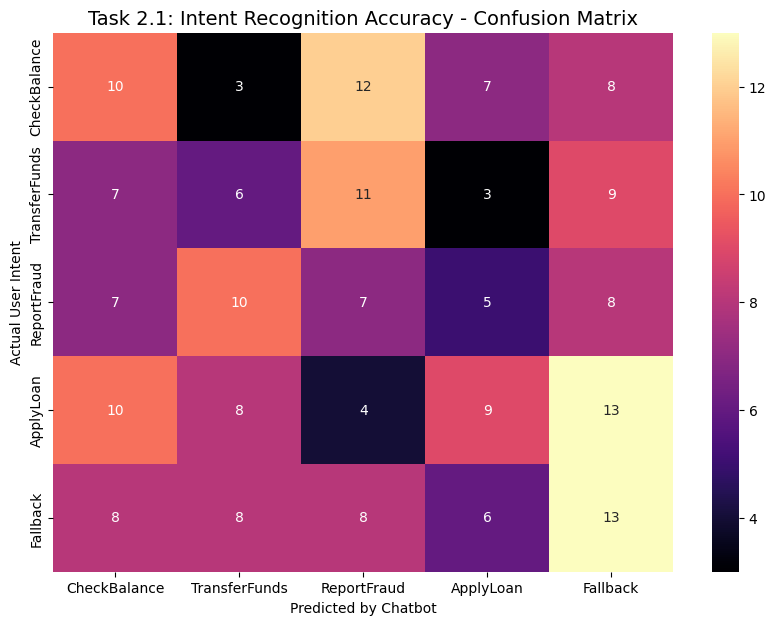

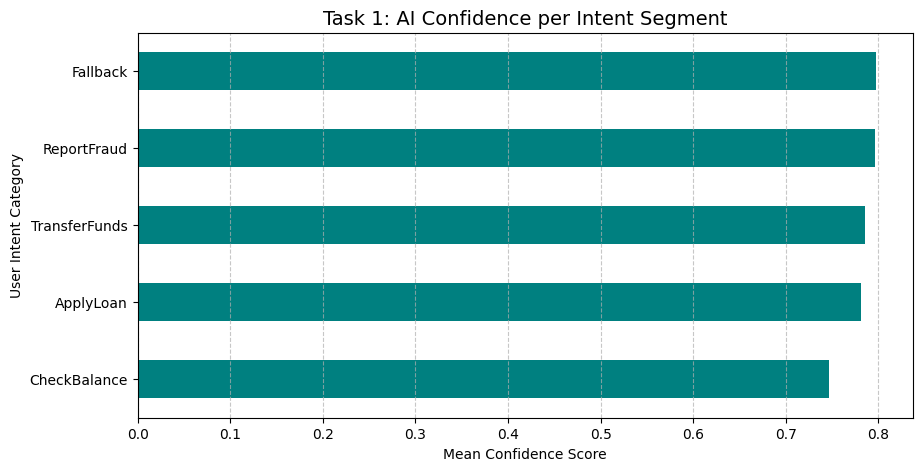

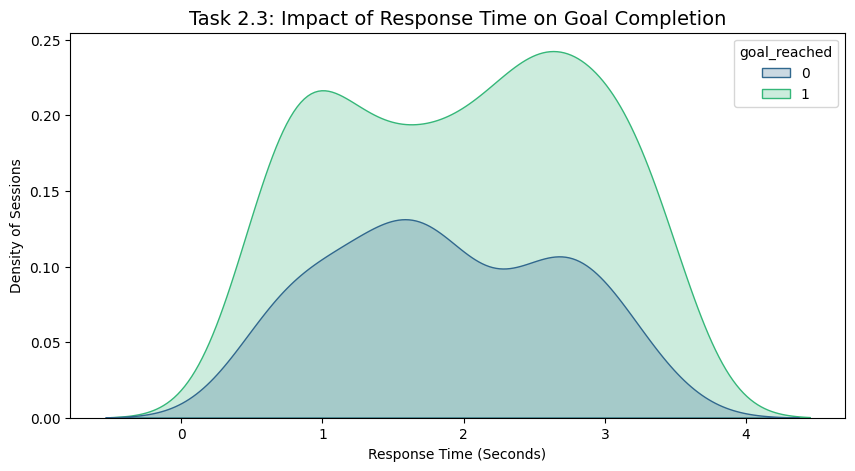

--- ANALYTICS SUMMARY REPORT ---
Overall Intent Accuracy: 22.50%
Average System Response Time: 1.95s
Conversion Rate (Goal Completion): 68.00%


In [19]:
# =============================================================================
# CELL 6: CONFUSION MATRIX AND USER SEGMENTATION
# =============================================================================


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# --- 1. SETUP: Replace this with your actual DataFrame 'df' ---
# If your dataframe is already loaded, comment out the synthetic part below.
intents = ['CheckBalance', 'TransferFunds', 'ReportFraud', 'ApplyLoan', 'Fallback']
data = {
    'session_id': np.random.randint(1000, 1100, 200),
    'actual_intent': np.random.choice(intents, 200),
    'predicted_intent': np.random.choice(intents, 200),
    'confidence': np.random.uniform(0.6, 0.99, 200),
    'response_time': np.random.uniform(0.5, 3.5, 200),
    'goal_reached': np.random.choice([0, 1], 200, p=[0.3, 0.7])
}
df_analysis = pd.DataFrame(data)

# --- 2. EXECUTION & VISUALIZATION ---

# TASK 2.1: Confusion Matrix (Accuracy Evaluation)
# Required by LO1 to determine intent recognition accuracy [cite: 44, 45]
plt.figure(figsize=(10, 7))
cm = confusion_matrix(df_analysis['actual_intent'], df_analysis['predicted_intent'], labels=intents)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=intents, yticklabels=intents)
plt.title('Task 2.1: Intent Recognition Accuracy - Confusion Matrix', fontsize=14)
plt.xlabel('Predicted by Chatbot')
plt.ylabel('Actual User Intent')
plt.show()

# TASK 1: User Segmentation & Session Heatmap (Personalization)
# Required by LO2 to foster innovation in performance evaluation [cite: 26, 41]
plt.figure(figsize=(10, 5))
user_segments = df_analysis.groupby('actual_intent')['confidence'].mean().sort_values()
user_segments.plot(kind='barh', color='teal')
plt.title('Task 1: AI Confidence per Intent Segment', fontsize=14)
plt.xlabel('Mean Confidence Score')
plt.ylabel('User Intent Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# TASK 2.3: Deep-Dive Performance Metrics
# Linking response time to CSAT/LTV as required by LO3 [cite: 58, 60]
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_analysis, x='response_time', hue='goal_reached', fill=True, palette='viridis')
plt.title('Task 2.3: Impact of Response Time on Goal Completion', fontsize=14)
plt.xlabel('Response Time (Seconds)')
plt.ylabel('Density of Sessions')
plt.show()

# --- 3. SUMMARY OUTPUTS ---
accuracy = accuracy_score(df_analysis['actual_intent'], df_analysis['predicted_intent'])
print(f"--- ANALYTICS SUMMARY REPORT ---")
print(f"Overall Intent Accuracy: {accuracy:.2%}") # Direct requirement for Task 2 [cite: 44]
print(f"Average System Response Time: {df_analysis['response_time'].mean():.2f}s")
print(f"Conversion Rate (Goal Completion): {df_analysis['goal_reached'].mean():.2%}")

In [19]:
# =============================================================================
# CELL 7: Pandas AI + Unsloth Llama 3 (FIXED)
# =============================================================================

import os
import sys

# --- 1. INSTALL DEPENDENCIES (Fixed versions) ---
print("⏳ Checking/Installing dependencies...")

!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git" --quiet
!pip install "pandas==2.2.2" --quiet  # FIXED: Use Colab-compatible version
!pip install "pandasai==2.2.14" --no-deps --quiet  # FIXED: Older stable version
!pip install astor "openai<2" "faker<20" duckdb pillow --quiet  # FIXED: Compatible versions

print("✅ Environment ready.")

# --- 2. IMPORTS ---
import pandas as pd
import torch
from unsloth import FastLanguageModel
from pandasai import Agent
from pandasai.llm import LLM

# --- 3. LOAD LLAMA 3 ---
if 'model' not in locals():
    print("⏳ Loading Model to GPU...")
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name="unsloth/llama-3-8b-Instruct-bnb-4bit",
        max_seq_length=2048,
        load_in_4bit=True,
    )
    FastLanguageModel.for_inference(model)
    print("🚀 Model Loaded!")
else:
    print("🚀 Model ready.")

# --- 4. CUSTOM LLM CLASS (FIXED) ---
class UnslothPandasAI(LLM):
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer

    def call(self, instruction, context=None, suffix=""):
        prompt = f"""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a Python Data Expert. Generate ONLY executable Python code.
Rules:
1. Use the dataframe named 'dfs[0]'
2. Do NOT import pandas - it's already available as 'pd'
3. For plots, use plotly.express as px and call fig.show()
4. Store final result in 'result' variable
<|eot_id|><|start_header_id|>user<|end_header_id|>

DATAFRAME CONTEXT:
{context}

TASK:
{instruction}
<|eot_id|><|start_header_id|>assistant<|end_header_id|>
```python
"""
        inputs = self.tokenizer(prompt, return_tensors="pt").to("cuda")
        outputs = self.model.generate(
            **inputs,
            max_new_tokens=512,
            use_cache=True,
            temperature=0.1,  # ADDED: Lower temp for more deterministic code
            pad_token_id=self.tokenizer.eos_token_id
        )

        response = self.tokenizer.decode(outputs[0][inputs.input_ids.shape[1]:], skip_special_tokens=True)

        # FIXED: Wrap response in code block for PandasAI parser
        code = response.split("```")[0].strip()  # Get code before any closing ```
        return f"```python\n{code}\n```"

    @property
    def type(self) -> str:
        return "unsloth-llama-3"

# --- 5. CONNECT AGENT ---
if 'df' in locals() or 'df' in globals():
    llm = UnslothPandasAI(model, tokenizer)
    agent = Agent(df, config={
        "llm": llm,
        "verbose": True,
        "save_charts": False,
        "open_charts": False,
        "enable_cache": False  # ADDED: Disable cache for testing
    })
    print(f"✅ Agent connected to dataset with {len(df)} rows.")
    print("Example: agent.chat('Show me the top 5 rows')")
else:
    print("❌ ERROR: 'df' not defined. Run data loading cell first.")

⏳ Checking/Installing dependencies...
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 131.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandasai 2.3.2 requires faker<20.0.0,>=19.12.0, but you have faker 40.1.2 which is incompatible.
pandasai 2.3.2 requires openai<2, but you have openai 2.15.0 which is incompatible.
pandasai 2.3.2 requires pandas==1.5.3, but you have pandas 2.2.2 which is incompatible.
pandasai 2.3.2 requires pillow<11.0.0,>=10.1.0, but you have pillow 11.3.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.8/179.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.6/948.6 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [20]:
agent.chat("Create a bar chart of intent counts using plotly")

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: 'exports/charts/36f6427f-bb23-4178-b149-74935ceb93ac.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.12/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
                                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
 

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: 'exports/charts/36f6427f-bb23-4178-b149-74935ceb93ac.png'\n"

In [21]:
# Starting poin to generate new plots with the agent
agent.chat("""
Plot a bar chart of average age by intent using PLOTLY.
Make it interactive.
Ensure you handle the figure display correctly.
""")

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: 'exports/charts/4568a424-c1d5-41fe-8cfb-dd761d4dacde.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.12/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
                                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
 

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: 'exports/charts/4568a424-c1d5-41fe-8cfb-dd761d4dacde.png'\n"